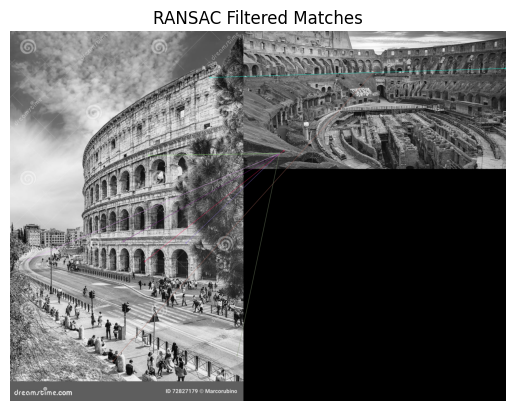

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('image1.jpg', 0)
img2 = cv2.imread('image2.jpg', 0)

# Detect keypoints and descriptors
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

# RANSAC
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)

# Draw inliers
matchesMask = mask.ravel().tolist()
result = cv2.drawMatches(img1, kp1, img2, kp2, good, None, matchesMask=matchesMask, flags=2)

plt.imshow(result)
plt.title("RANSAC Filtered Matches")
plt.axis('off')
plt.show()


In [2]:
# Before drawMatches, resize both images to the same height (optional)
h = max(img1.shape[0], img2.shape[0])
img1_resized = cv2.resize(img1, (img1.shape[1], h))
img2_resized = cv2.resize(img2, (img2.shape[1], h))

# Then draw matches
result = cv2.drawMatches(img1_resized, kp1, img2_resized, kp2, good, None, matchesMask=matchesMask, flags=2)


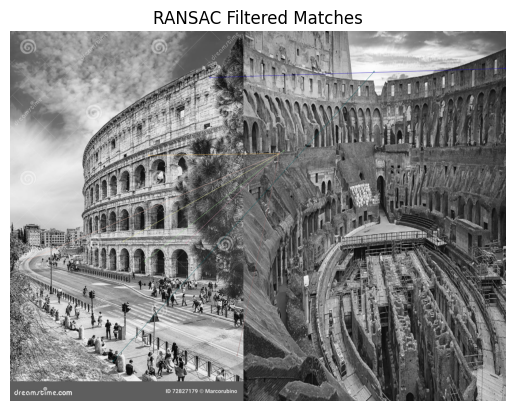

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('image1.jpg', 0)
img2 = cv2.imread('image2.jpg', 0)

# Detect keypoints and descriptors
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

# RANSAC
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)

# Draw inliers
matchesMask = mask.ravel().tolist()
result = cv2.drawMatches(img1_resized, kp1, img2_resized, kp2, good, None, matchesMask=matchesMask, flags=2)
plt.imshow(result)
plt.title("RANSAC Filtered Matches")
plt.axis('off')
plt.show()
